In [1]:
import cupy as cp
from poly import *
from fresnel import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cp.cuda.Device(1).use()

<CUDA Device 1>

In [16]:
n = 1000
print('Creating petal with %d points'%(n*2*24))
p = petal_FT(n_petals=24, n_border=n,profile_type='trapeze',profile_path='Matlab_files/Param_PourOc.mat')


Creating petal with 48000 points


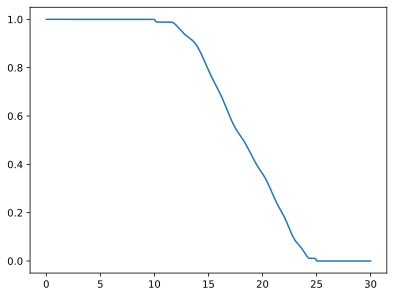

In [17]:
r=np.linspace(0,30,10001)
plt.plot(r,p.profile(r))

In [18]:
m = 2**13
diff = diffraction(p,m)


In [19]:
diff.compute_fresnel_filter()

In [20]:
diff.compute_polygonal_fmask()

nslices =  14386
Processing slice number 0 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 1 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 2 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 3 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 4 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 5 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 6 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 7 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 8 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 9 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 10 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 11 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 12 out of 14386
shape of wi is  (4665, 2)
75264
Processing slice number 13 out of 14386
shape of wi is  (

In [25]:
diff.compute_diffraction_patterns()

Cuda is on !


In [26]:
diff.diffracted.shape

(8192, 8192, 1)

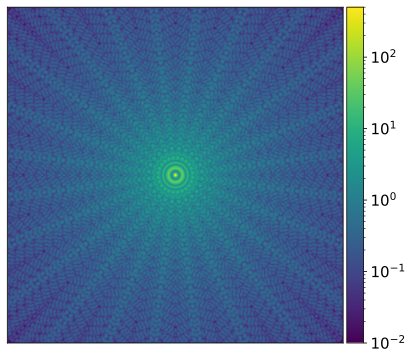

In [27]:
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
fmask = diff.polygonal_fmask
nzoom = 1000
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
im0=ax.imshow(np.abs(fmask.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom]),norm=colors.LogNorm(vmax=500,vmin=1e-2))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

In [28]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.scatter(p.Gamma[:,0],p.Gamma[:,1],s=1)

/tmp/ipykernel_935866/906109894.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


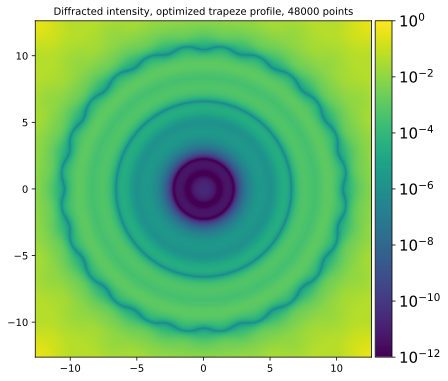

In [37]:
diffracted = diff.diffracted
nzoom = 512
fig,ax=plt.subplots(1,1,figsize=(6.4,4.8*1.4))
L = diff.petal.L * nzoom/4096
ext = [-L,L,-L,L]
im0=ax.imshow(np.abs(diffracted.real[4096-nzoom:4096+nzoom,4096-nzoom:4096+nzoom])**2,
              norm=colors.LogNorm(vmax=1,vmin=1e-12), extent=ext)
ax.set_title('Diffracted intensity, optimized trapeze profile, %d points'%(diff.petal.n_border*48), fontsize=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
#plt.setp(ax,xticks=[],yticks=[])
cbar=fig.colorbar(im0, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)

In [32]:
diff.petal.Gamma.shape

(47952, 2)